/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


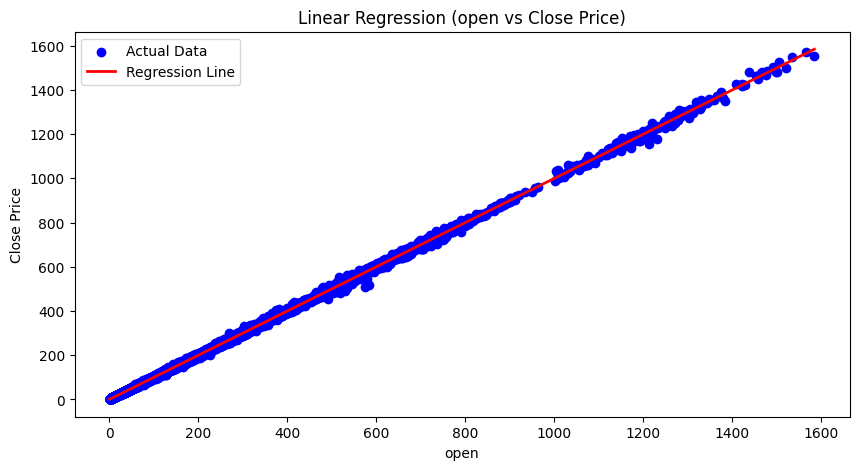

Linear Regression Coefficients: [0.99978308]
Linear Regression Intercept: 0.035617723121916356
Mean Squared Error (Linear Regression): 2.135309194765889
R2 Score (Linear Regression): 0.9996941010180989


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


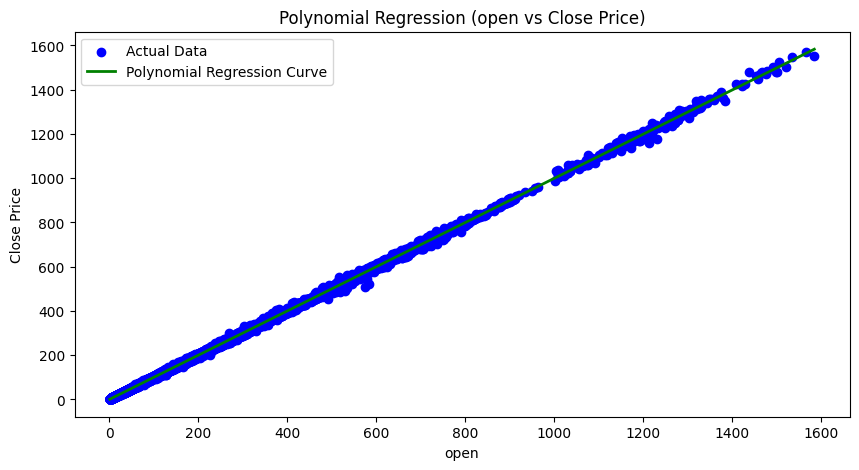

Mean Squared Error (Polynomial Regression): 2.134821030965374
R2 Score (Polynomial Regression): 0.9996941709512074


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/prices.csv"  # Ensure this file is uploaded to Colab
data = pd.read_csv(file_path)

# Select features and target
X = data[['open', 'low', 'high', 'volume']]  # Features
Y = data['close']  # Target

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# MULTIPLE LINEAR REGRESSION
# Fit the model on one feature (e.g., open)
feature = "open"
X_feature_train = X_train[[feature]]
X_feature_test = X_test[[feature]]

linear_model = LinearRegression()
linear_model.fit(X_feature_train, Y_train)

# Generate predictions for the range of feature values
x_range = np.linspace(X_feature_test.min(), X_feature_test.max(), 100).reshape(-1, 1)
y_range_pred = linear_model.predict(x_range)

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(X_feature_test, Y_test, color="blue", label="Actual Data")
plt.plot(x_range, y_range_pred, color="red", label="Regression Line", linewidth=2)
plt.title(f"Linear Regression ({feature} vs Close Price)")
plt.xlabel(feature)
plt.ylabel("Close Price")
plt.legend()
plt.show()

print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression Intercept:", linear_model.intercept_)
print("Mean Squared Error (Linear Regression):", mean_squared_error(Y_test, linear_model.predict(X_feature_test)))
print("R2 Score (Linear Regression):", r2_score(Y_test, linear_model.predict(X_feature_test)))

# POLYNOMIAL REGRESSION
# Add polynomial features (degree=2 for quadratic relationship)
poly_features = PolynomialFeatures(degree=2)
X_feature_poly_train = poly_features.fit_transform(X_feature_train)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_feature_poly_train, Y_train)

# Generate predictions for the range of feature values
x_range_poly = poly_features.transform(x_range)
y_range_poly_pred = poly_model.predict(x_range_poly)

# Plot the polynomial regression curve
plt.figure(figsize=(10, 5))
plt.scatter(X_feature_test, Y_test, color="blue", label="Actual Data")
plt.plot(x_range, y_range_poly_pred, color="green", label="Polynomial Regression Curve", linewidth=2)
plt.title(f"Polynomial Regression ({feature} vs Close Price)")
plt.xlabel(feature)
plt.ylabel("Close Price")
plt.legend()
plt.show()

print("Mean Squared Error (Polynomial Regression):", mean_squared_error(Y_test, poly_model.predict(poly_features.transform(X_feature_test))))
print("R2 Score (Polynomial Regression):", r2_score(Y_test, poly_model.predict(poly_features.transform(X_feature_test))))
